In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [45]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

import networkx as nx
import torch
from torch import nn

from model import simple_embedding
from utils import *
import evaluation

from matplotlib import pyplot as plt
import matplotlib

### graph

In [3]:
nodeid_mapping = {
    0: "user1",
    1: "user2",
    2: "user3",
    3: "movie1",
    4: "movie2",
    5: "movie3",
    6: "movie4",
    7: "movie5",
}

In [4]:
edges = [(0, 3), (0, 4), (0, 7), (1, 3), (1, 4), (1, 5), (2, 6), (2, 7), (2, 5)]

In [12]:
G = nx.Graph()
G.add_edges_from(edges)

In [13]:
pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)

In [14]:
from model import LightGCN

In [20]:
emb = torch.tensor([0, 1, 0, 0, 0, 0, 0, 0]).unsqueeze(-1)

In [85]:
def get_emb_lgcn(passes, start):
    result = start.clone()
    if passes >= 2:
        lgcn = LightGCN(passes)
        result = lgcn.forward(result, pos_edge_index)

    result = {i: result[i, 0].item() ** 0.5 for i in range(8)}
    return result

In [86]:
def update(i):
    ax.clear()
    ax.set_title(f"lgcn {i}")
    val_map = get_emb_lgcn(1 + i, emb)
    values = [val_map.get(node, 0.25) for node in G.nodes()]

    nx.draw(
        G,
        cmap=plt.get_cmap("Greys"),
        pos=pos,
        node_color=values,
        with_labels=True,
        font_color="orange",
        node_size=1000,
        edgecolors="black",
        vmin=0,
        vmax=1,
        ax=ax,
    )

Text(0.5, 1.0, 'lgcn 1')

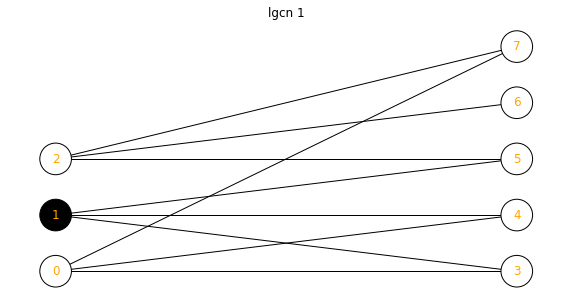

In [87]:
val_map = get_emb_lgcn(1, emb)

values = [val_map.get(node, 0.25) for node in G.nodes()]


pos = {
    0: (1, 0),
    1: (1, 1),
    2: (1, 2),
    3: (2, 0),
    4: (2, 1),
    5: (2, 2),
    6: (2, 3),
    7: (2, 4),
}

fig, ax = plt.subplots(figsize=(10, 5))
nx.draw(
    G,
    cmap=plt.get_cmap("Greys"),
    pos=pos,
    node_color=values,
    with_labels=True,
    font_color="orange",
    node_size=1000,
    edgecolors="black",
    vmin=0,
    vmax=1,
    ax=ax,
)
ax.set_title("lgcn 1")

In [88]:
ani = matplotlib.animation.FuncAnimation(
    fig, update, frames=range(5), interval=2000, repeat=True
)
ani.save("network.gif", dpi=80, writer="imagemagick")
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


In [89]:
ani